In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import proj3d, Axes3D

In [4]:
from sympy.parsing.sympy_parser import parse_expr
from sympy import Matrix, symbols, expand

In [5]:
from matplotlib.patches import FancyArrowPatch
class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs
    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

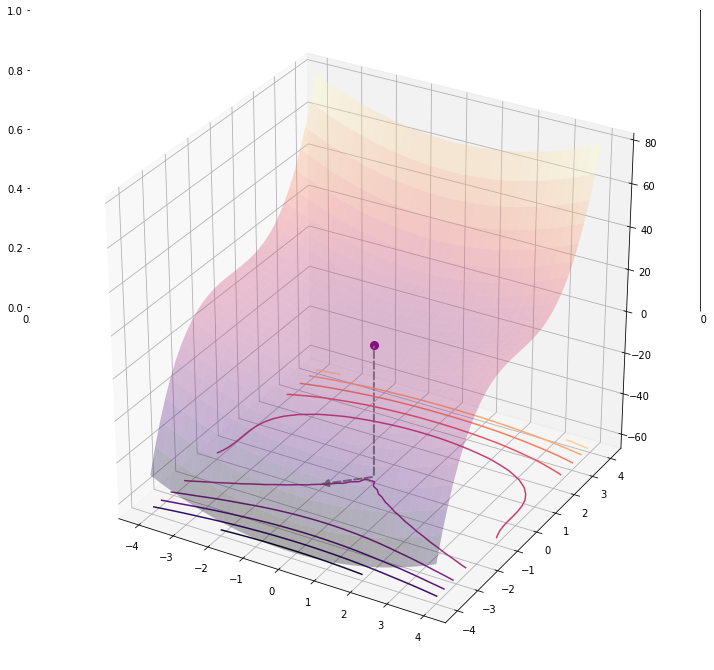

In [55]:
P = parse_expr('Matrix([0,0])')
u = parse_expr('Matrix([-1,-1])')
#f = parse_expr('((x+2)**2 + x*y + y**2 + 10) / ((x+2)**2 + y**2 + 1)')
f = parse_expr('x**2 + y**3')

if not ('Matrix' in str(type(P)) and P.shape == (2, 1)):
    raise ValueError('Point P must be a 2x1 matrix.')
    
if len(P.free_symbols) != 0:
    raise ValueError('Point P cannot contain any variables.')
    
if not ('Matrix' in str(type(u)) and u.shape == (2, 1)):
    raise ValueError('Vector u must be a 2x1 matrix.')
    
if len(u.free_symbols) != 0:
    raise ValueError('Vector u cannot contain any variables.')

if len(f.free_symbols) != 2:
    raise ValueError('Function f requires two variables.')

variables = [str(s) for s in f.free_symbols]
variables.sort()
x, y = variables[0], variables[1]
t = symbols('t')
grad = Matrix([f.diff(x), f.diff(y)])

P_grad = grad.subs(x, P[0] + t).subs(y, P[1] + t)
Df = Matrix(np.dot(P_grad.T, u))

# create surface plot
fig = plt.figure(figsize=(12,12))
plt.subplot(211)

xs = np.linspace(-4, 4, 32)
ys = np.linspace(-4, 4, 32)
X, Y = np.meshgrid(xs, ys)
zs = np.array([expand(f).subs(x, xp).subs(y, yp).evalf() for xp, yp in zip(np.ravel(X), np.ravel(Y))]).astype('float')
Z = zs.reshape(X.shape)

minz = np.floor(np.min(Z))

ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap=cm.magma, lw=3, alpha=0.3)
ax.contour(X, Y, Z, 10, lw=3, cmap="magma", linestyles="solid", offset=minz)

# plot directional derivative
px, py, pz = P[0], P[1], expand(f).subs(x, P[0]).subs(y, P[1]).evalf()
dx, dy, dz = u[0] + px, u[1] + py, expand(f).subs(x, u[0] + px).subs(y, u[1] + py).evalf()

plot([px], [py], [pz], 'o', zorder=3, c='purple', markersize=8)
ax.add_artist(Arrow3D([float(px), float(u[0])], [float(py), float(u[1])], [minz]*2, mutation_scale=15, lw=2, arrowstyle="-|>", ls='dashed', color="gray", zorder=5))
ax.add_artist(Arrow3D([float(px), float(px)], [float(py), float(py)], [minz, float(pz)], mutation_scale=15, lw=2, ls='dashed', arrowstyle="-", color="gray", zorder=5))